In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('/kaggle/input/hranalytics/HR_Analytics.csv')

In [63]:
duplicated_rows = df[df.duplicated(subset='EmpID', keep=False)]
print(f"Tekrar Eden Satır Sayısı: {duplicated_rows.shape[0]}")
duplicated_rows.sort_values('EmpID')

Tekrar Eden Satır Sayısı: 20


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
327,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,2,80,0,5,3,1,5,4,0,4.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,2,80,0,5,3,1,5,4,0,4.0
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,2,80,1,20,3,3,3,2,2,0.0
1335,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,2,80,1,20,3,3,3,2,2,0.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,...,1,80,1,21,2,2,20,9,9,6.0
952,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,...,1,80,1,21,2,2,20,9,9,6.0
457,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,2,80,0,10,2,3,9,4,1,7.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,2,80,0,10,2,3,9,4,1,7.0
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,4,80,0,5,2,3,4,2,0,0.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,4,80,0,5,2,3,4,2,0,5.0


In [64]:
#verilerin listelenmesi
basic_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [65]:
df = pd.read_csv('/kaggle/input/hranalytics/HR_Analytics.csv')

egitim_sayisi = df['EducationField'].value_counts()

print("Eğitim Alanlarına Göre Çalışan Sayısı:\n", egitim_sayisi)


Eğitim Alanlarına Göre Çalışan Sayısı:
 EducationField
Life Sciences       607
Medical             470
Marketing           161
Technical Degree    132
Other                83
Human Resources      27
Name: count, dtype: int64


In [66]:
df = pd.read_csv('/kaggle/input/hranalytics/HR_Analytics.csv')

departman_toplam = df['Department'].value_counts()

departman_ayrilanlar = df[df['Attrition'] == 'Yes']['Department'].value_counts()

ayrilma_orani = (departman_ayrilanlar / departman_toplam) * 100

print("Departman Bazında İşten Ayrılma Oranları(%):\n", ayrilma_orani)

ayrilma_orani = ayrilma_orani.fillna(0)

ayrilma_orani = ayrilma_orani.sort_values(ascending=False)

print("\nDepartman Bazında Sıralanmış İşten Ayrılma Oranları(%):\n", ayrilma_orani)


Departman Bazında İşten Ayrılma Oranları(%):
 Department
Research & Development    13.753878
Sales                     20.666667
Human Resources           19.047619
Name: count, dtype: float64

Departman Bazında Sıralanmış İşten Ayrılma Oranları(%):
 Department
Sales                     20.666667
Human Resources           19.047619
Research & Development    13.753878
Name: count, dtype: float64


In [67]:
df_combined = df.groupby('EmpID').agg(lambda x: x.mean() if x.dtype == 'float64' else x.mode().iloc[0])
print(f"Birleştirilmiş veri setindeki satır sayısı: {df_combined.shape[0]}")
df_combined.head()

Birleştirilmiş veri setindeki satır sayısı: 1470


,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmpID,,,,,,,,,,,,,,,,,,,,,
RM001,41,36-45,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5.0
RM002,49,46-55,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7.0
RM003,37,36-45,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0.0
RM004,33,26-35,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0.0
RM005,27,26-35,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2.0


In [68]:
df = pd.read_csv('/kaggle/input/hranalytics/HR_Analytics.csv')

print("Sütun Adları:", df.columns)

print("Mesafe Sütunu:\n", df['DistanceFromHome'].describe())
print("İş Tatmini Sütunu:\n", df['JobSatisfaction'].describe())

print("Eksik Veriler:\n", df[['DistanceFromHome', 'JobSatisfaction']].isnull().sum())

df['DistanceFromHome'] = df['DistanceFromHome'].fillna(df['DistanceFromHome'].median())
df['JobSatisfaction'] = df['JobSatisfaction'].fillna(df['JobSatisfaction'].median())

korelasyon = df[['DistanceFromHome', 'JobSatisfaction']].corr().iloc[0, 1]
print(f"Mesafe ile İş Tatmini Arasındaki Korelasyon: {korelasyon:.2f}")

if korelasyon > 0:
    print("Pozitif bir ilişki var: Mesafe arttıkça iş tatmini artıyor.")
elif korelasyon < 0:
    print("Negatif bir ilişki var: Mesafe arttıkça iş tatmini azalıyor.")
else:
    print("Bir ilişki yok.")


Sütun Adları: Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Mesafe Sütunu:
 count    1480.000000
mean        9.220270
std         8.131201
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64
İş Tatmini

In [69]:
missing_data_rows = df[df.isnull().any(axis=1)]
print("Eksik Değer İçeren Satırlar:\n", missing_data_rows)

Eksik Değer İçeren Satırlar:
       EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
28    RM024   21    18-25        No      Travel_Rarely        391   
31    RM363   21    18-25        No         Non-Travel        895   
45    RM207   22    18-25        No      Travel_Rarely       1136   
99    RM139   25    18-25        No      Travel_Rarely        959   
100   RM256   25    18-25        No      Travel_Rarely        685   
103   RM406   25    18-25       Yes      Travel_Rarely        688   
222   RM405   28    26-35        No      Travel_Rarely       1300   
262   RM072   29    26-35        No      Travel_Rarely       1328   
264   RM206   29    26-35       Yes      Travel_Rarely        121   
268   RM253   29    26-35        No      Travel_Rarely        665   
269   RM255   29    26-35        No      Travel_Rarely       1247   
329   RM008   30    26-35        No      Travel_Rarely       1358   
336   RM140   30    26-35        No      Travel_Rarely       1240   
337 

In [70]:
df = pd.read_csv('/kaggle/input/hranalytics/HR_Analytics.csv')

sayisal_sutunlar = df.select_dtypes(include=[np.number])

ortalama = sayisal_sutunlar.mean()
medyan = sayisal_sutunlar.median()
mod = sayisal_sutunlar.mode().iloc[0]
standart_sapma = sayisal_sutunlar.std()

print("Ortalama:\n", ortalama)
print("\nMedyan:\n", medyan)
print("\nMod:\n", mod)
print("\nStandart Sapma:\n", standart_sapma)
print("\nTemel İstatistikler (describe):\n", sayisal_sutunlar.describe())


Ortalama:
 Age                            36.917568
DailyRate                     801.384459
DistanceFromHome                9.220270
Education                       2.910811
EmployeeCount                   1.000000
EmployeeNumber               1031.860811
EnvironmentSatisfaction         2.724324
HourlyRate                     65.845270
JobInvolvement                  2.729730
JobLevel                        2.064865
JobSatisfaction                 2.725000
MonthlyIncome                6504.985811
MonthlyRate                 14298.460811
NumCompaniesWorked              2.687162
PercentSalaryHike              15.210135
PerformanceRating               3.153378
RelationshipSatisfaction        2.708784
StandardHours                  80.000000
StockOptionLevel                0.791892
TotalWorkingYears              11.281757
TrainingTimesLastYear           2.797973
WorkLifeBalance                 2.760811
YearsAtCompany                  7.009459
YearsInCurrentRole              4.228378
Years

df_cleaned = df.dropna()

In [71]:
df_cleaned = df.dropna()

In [72]:
remaining_missing_values = df_cleaned.isnull().sum().sum()
print("\nSilme işleminden sonra kalan eksik (NaN) değer sayısı:", remaining_missing_values)


Silme işleminden sonra kalan eksik (NaN) değer sayısı: 0


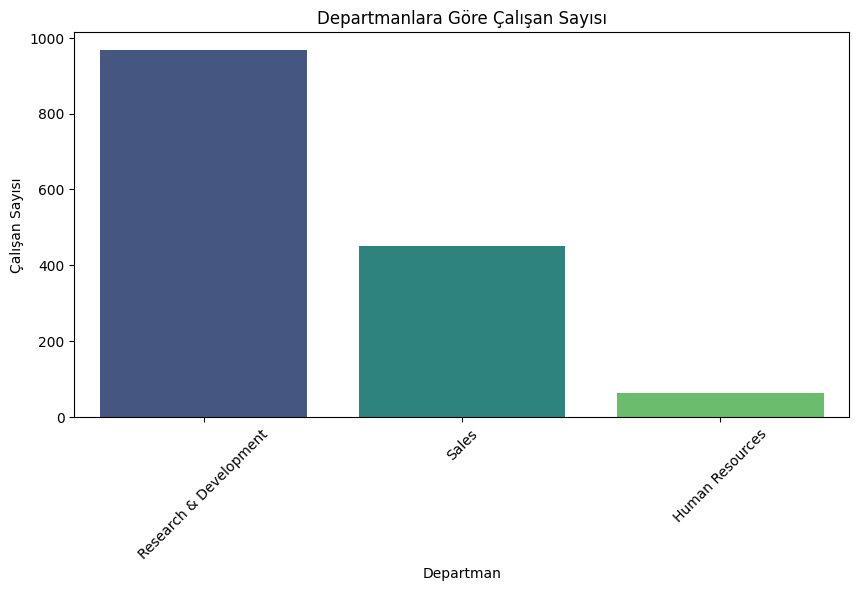

In [73]:
department_counts = df['Department'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.title('Departmanlara Göre Çalışan Sayısı')
plt.xlabel('Departman')
plt.ylabel('Çalışan Sayısı')
plt.xticks(rotation=45)
plt.show()

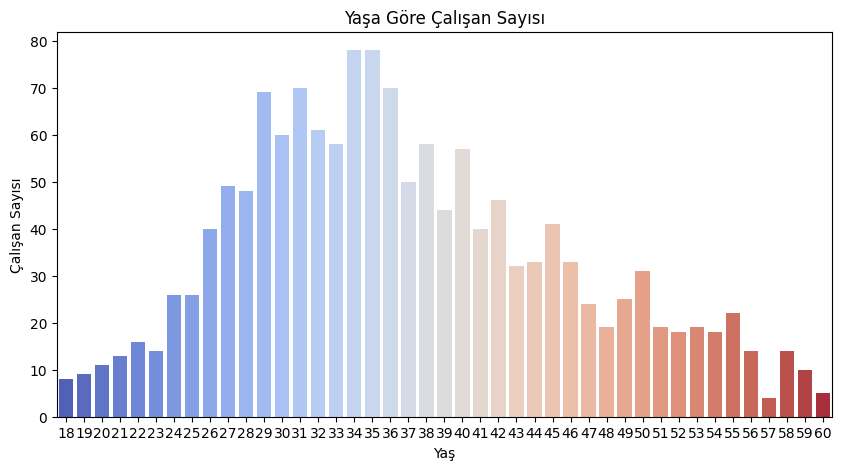

In [74]:
age_counts = df['Age'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='coolwarm')
plt.title('Yaşa Göre Çalışan Sayısı')
plt.xlabel('Yaş')
plt.ylabel('Çalışan Sayısı')
plt.show()

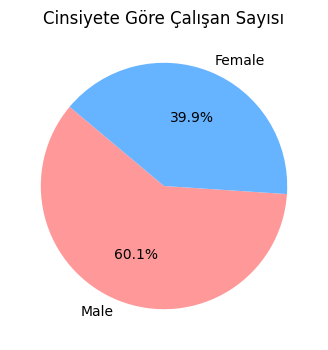

In [75]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Cinsiyete Göre Çalışan Sayısı')
plt.show()